# Data Processing

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from verstack.stratified_continuous_split import scsplit

## Config

In [2]:
pd.set_option('display.max_columns', None)

## Processing

### Load & Merge

In [3]:
# Load Images, Subject and Tumor Data
data = pd.read_csv('../data/dataset.csv', header=0)
tumors = pd.read_csv('../data/tumors.csv', header=0)

# Merge Tumor Data
data = pd.merge(data, tumors, on='SubjectID')

print(data.shape)
data.head()

(461, 30)


,SubjectID,Sex,Age,CancerType,ScannerType,Scanner Strength (Tesla),In-plane voxel size (mm),Slice Thickness (mm),Matrix size,TRAIN or TEST,Prior Craniotomy/Biopsy/Resection,NumberMetastases,VolumeMetastases_mm3,Unnamed: 13,BraTS_ID,T1pre,FLAIR,T1post,T2Synth,Seg,BraTS-seg,GT-NM,GT-V,S-NM,S-V,S-VMax,S-VMin,S-VMean,S-VStd,S-VDiff
0,100324A,Female,68,Lung,GE 1.5 T Signa HDxt,1.5,1.17x1.17,1.5,256x256x98,TRAIN,No,34,11080.871970,NaN,BraTS-MET-00712-000,../data/raw/UCSF_BrainMetastases_TRAIN/100324A...,../data/raw/UCSF_BrainMetastases_TRAIN/100324A...,../data/raw/UCSF_BrainMetastases_TRAIN/100324A...,../data/raw/UCSF_BrainMetastases_TRAIN/100324A...,../data/raw/UCSF_BrainMetastases_TRAIN/100324A...,../data/raw/UCSF_BrainMetastases_TRAIN/100324A...,34,11080.871970,30,11080.871785,8126.796652,8.240098,369.362393,1444.914572,1.854015e-04
1,100279B,Female,71,Renal,GE 1.5 T Signa HDxt,1.5,0.86x0.86,1.5,256x256x104,TRAIN,No,18,6200.650296,NaN,BraTS-MET-00682-001,../data/raw/UCSF_BrainMetastases_TRAIN/100279B...,../data/raw/UCSF_BrainMetastases_TRAIN/100279B...,../data/raw/UCSF_BrainMetastases_TRAIN/100279B...,../data/raw/UCSF_BrainMetastases_TRAIN/100279B...,../data/raw/UCSF_BrainMetastases_TRAIN/100279B...,../data/raw/UCSF_BrainMetastases_TRAIN/100279B...,18,6200.650296,18,6200.650213,2005.212951,4.431410,344.480567,511.602309,8.342561e-05
2,100222B,Female,66,GU Fallopian,GE 1.5 T Signa HDxt,1.5,0.86x0.86,1.5,256x256x100,TRAIN,No,7,787.683109,NaN,BraTS-MET-00644-001,../data/raw/UCSF_BrainMetastases_TRAIN/100222B...,../data/raw/UCSF_BrainMetastases_TRAIN/100222B...,../data/raw/UCSF_BrainMetastases_TRAIN/100222B...,../data/raw/UCSF_BrainMetastases_TRAIN/100222B...,../data/raw/UCSF_BrainMetastases_TRAIN/100222B...,../data/raw/UCSF_BrainMetastases_TRAIN/100222B...,7,787.683109,7,787.683098,377.777689,8.862820,112.526157,135.891366,1.059775e-05
3,100312A,Female,77,GU Urothelial,GE 3.0 T Discovery MR750,3.0,0.53x0.53,2.0,512x136x512,TRAIN,No,1,11564.154053,NaN,BraTS-MET-00703-000,../data/raw/UCSF_BrainMetastases_TRAIN/100312A...,../data/raw/UCSF_BrainMetastases_TRAIN/100312A...,../data/raw/UCSF_BrainMetastases_TRAIN/100312A...,../data/raw/UCSF_BrainMetastases_TRAIN/100312A...,../data/raw/UCSF_BrainMetastases_TRAIN/100312A...,../data/raw/UCSF_BrainMetastases_TRAIN/100312A...,1,11564.154053,1,11564.154053,11564.154053,11564.154053,11564.154053,0.000000,7.457857e-11
4,100305C,Female,47,Colon,GE 3.0 T Discovery MR750,3.0,1.02x1.02,1.0,256x256x166,TRAIN,Yes,10,14953.864833,NaN,NaN,../data/raw/UCSF_BrainMetastases_TRAIN/100305C...,../data/raw/UCSF_BrainMetastases_TRAIN/100305C...,../data/raw/UCSF_BrainMetastases_TRAIN/100305C...,../data/raw/UCSF_BrainMetastases_TRAIN/100305C...,../data/raw/UCSF_BrainMetastases_TRAIN/100305C...,../data/raw/UCSF_BrainMetastases_TRAIN/100305C...,10,14953.864833,10,14953.864068,5579.076476,35.069070,1495.386407,1673.627363,7.652155e-04


### Clean

In [4]:
print('Total number of subjects:', len(data))

Total number of subjects: 461


1. Check for Missing Values

In [5]:
data.isnull().sum()

SubjectID                              0
Sex                                    0
Age                                    0
CancerType                             0
ScannerType                            0
Scanner Strength (Tesla)               0
In-plane voxel size (mm)               0
Slice Thickness (mm)                   0
Matrix size                            0
TRAIN or TEST                          0
Prior Craniotomy/Biopsy/Resection      0
NumberMetastases                       0
VolumeMetastases_mm3                   0
Unnamed: 13                          461
BraTS_ID                             137
T1pre                                  0
FLAIR                                  0
T1post                                 0
T2Synth                                0
Seg                                    0
BraTS-seg                              0
GT-NM                                  0
GT-V                                   0
S-NM                                   0
S-V             

2. Drop Unnecessary Columns

In [6]:
data = data.drop(columns=['Unnamed: 13', 'GT-NM', 'GT-V', 'TRAIN or TEST'])

data.isnull().sum()

SubjectID                              0
Sex                                    0
Age                                    0
CancerType                             0
ScannerType                            0
Scanner Strength (Tesla)               0
In-plane voxel size (mm)               0
Slice Thickness (mm)                   0
Matrix size                            0
Prior Craniotomy/Biopsy/Resection      0
NumberMetastases                       0
VolumeMetastases_mm3                   0
BraTS_ID                             137
T1pre                                  0
FLAIR                                  0
T1post                                 0
T2Synth                                0
Seg                                    0
BraTS-seg                              0
S-NM                                   0
S-V                                    0
S-VMax                                 0
S-VMin                                 0
S-VMean                                0
S-VStd          

3. Drop Subjects with no BraTS Annotation. After this, remove the BraTS21ID column.

In [7]:
data = data.dropna()
data = data.drop(columns=['BraTS_ID'])

data.isnull().sum()

SubjectID                            0
Sex                                  0
Age                                  0
CancerType                           0
ScannerType                          0
Scanner Strength (Tesla)             0
In-plane voxel size (mm)             0
Slice Thickness (mm)                 0
Matrix size                          0
Prior Craniotomy/Biopsy/Resection    0
NumberMetastases                     0
VolumeMetastases_mm3                 0
T1pre                                0
FLAIR                                0
T1post                               0
T2Synth                              0
Seg                                  0
BraTS-seg                            0
S-NM                                 0
S-V                                  0
S-VMax                               0
S-VMin                               0
S-VMean                              0
S-VStd                               0
S-VDiff                              0
dtype: int64

4. Check for Outliers

In [8]:
nm_threshold = 60
v_threshold = 8000

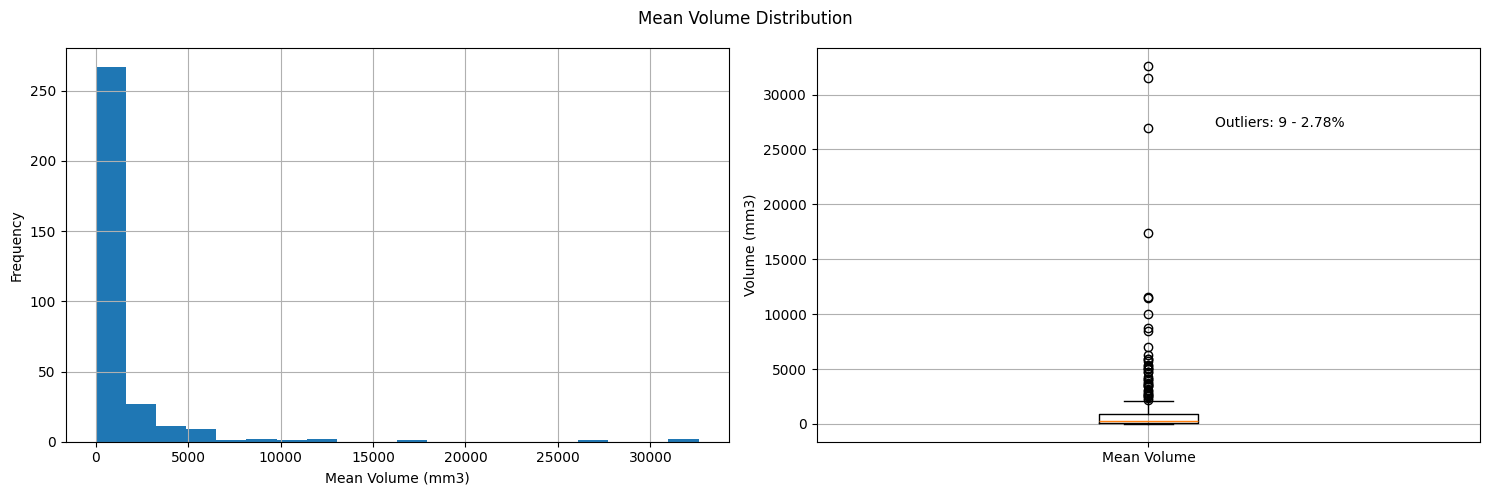

In [9]:
# Mean Volume Distribution
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(data['S-VMean'], bins=20)
plt.xlabel('Mean Volume (mm3)')
plt.ylabel('Frequency')
plt.grid()

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['S-VMean'])
plt.ylabel('Volume (mm3)')
plt.xticks([1], ['Mean Volume'])
plt.text(1.1, 27000, 'Outliers: ' + str(len(data[data['S-VMean'] > v_threshold])) + ' - ' + str(round(len(data[data['S-VMean'] > v_threshold])/len(data)*100, 2)) + '%')
plt.grid()

plt.suptitle('Mean Volume Distribution')
plt.tight_layout()
plt.show()

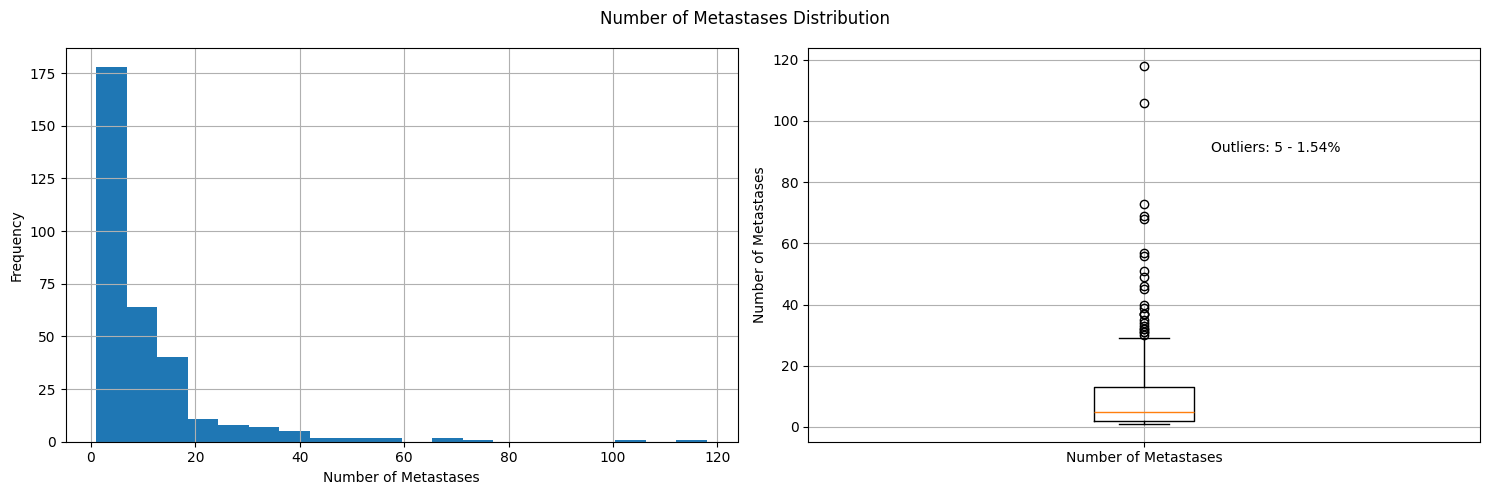

In [10]:
# Numer of Metastases Distribution
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(data['NumberMetastases'], bins=20)
plt.xlabel('Number of Metastases')
plt.ylabel('Frequency')
plt.grid()

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['NumberMetastases'])
plt.ylabel('Number of Metastases')
plt.xticks([1], ['Number of Metastases'])
plt.text(1.1, 90, 'Outliers: ' + str(len(data[data['NumberMetastases'] > nm_threshold])) + ' - ' + str(round(len(data[data['NumberMetastases'] > nm_threshold])/len(data)*100, 2)) + '%')
plt.grid()

plt.suptitle('Number of Metastases Distribution')
plt.tight_layout()
plt.show()

5. Remove Outliers

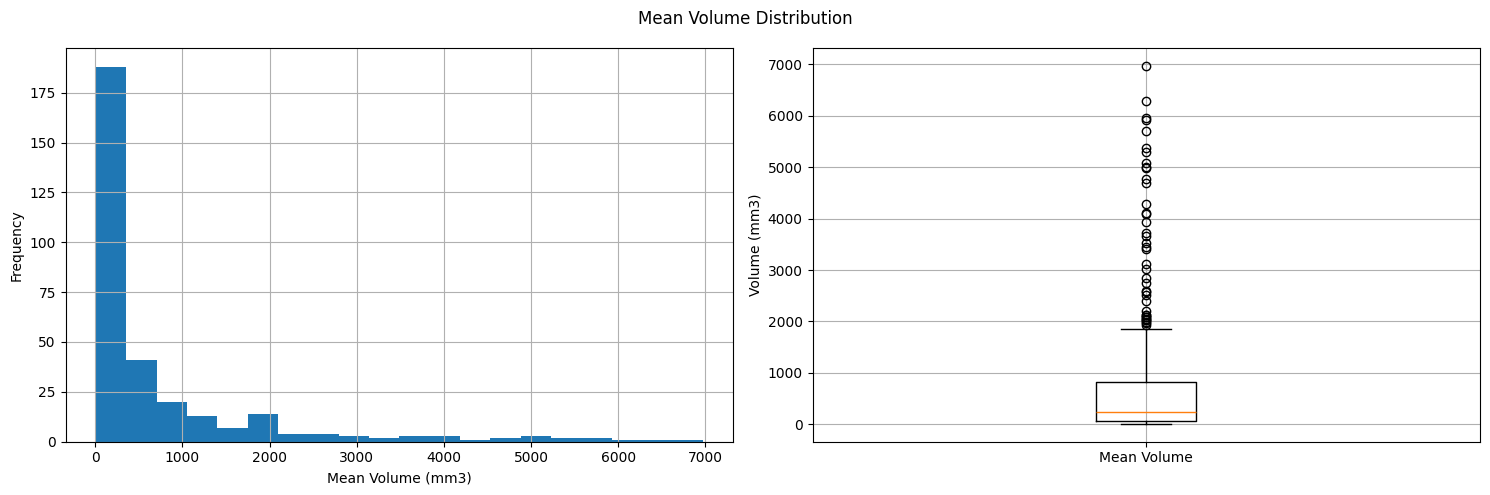

In [11]:
# Remove outliers
data = data[data['S-VMean'] < v_threshold]

# Mean Volume Distribution
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(data['S-VMean'], bins=20)
plt.xlabel('Mean Volume (mm3)')
plt.ylabel('Frequency')
plt.grid()

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['S-VMean'])
plt.ylabel('Volume (mm3)')
plt.xticks([1], ['Mean Volume'])
plt.grid()

plt.suptitle('Mean Volume Distribution')
plt.tight_layout()
plt.show()

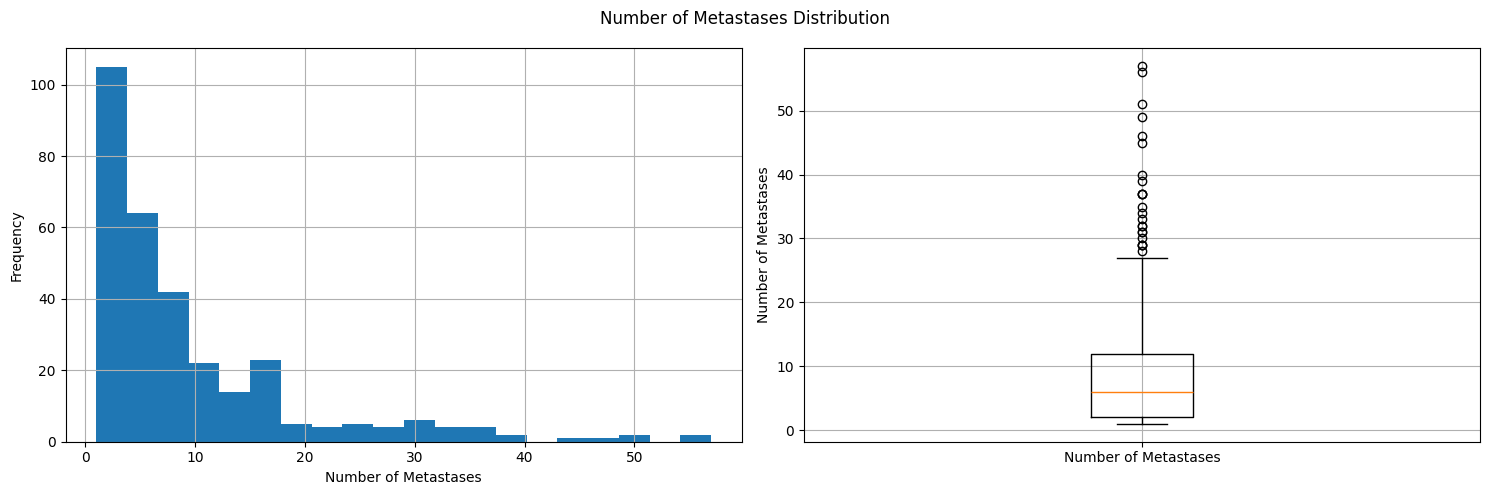

In [12]:
# Remove outliers
data = data[data['NumberMetastases'] < nm_threshold]

# Numer of Metastases Distribution
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(data['NumberMetastases'], bins=20)
plt.xlabel('Number of Metastases')
plt.ylabel('Frequency')
plt.grid()

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(data['NumberMetastases'])
plt.ylabel('Number of Metastases')
plt.xticks([1], ['Number of Metastases'])
plt.grid()

plt.suptitle('Number of Metastases Distribution')
plt.tight_layout()
plt.show()

In [13]:
print('Subjects left after cleaning:', len(data))

Subjects left after cleaning: 310


### Types Normalization

1. Type Check

In [14]:
data.dtypes

SubjectID                             object
Sex                                   object
Age                                    int64
CancerType                            object
ScannerType                           object
Scanner Strength (Tesla)             float64
In-plane voxel size (mm)              object
Slice Thickness (mm)                 float64
Matrix size                           object
Prior Craniotomy/Biopsy/Resection     object
NumberMetastases                       int64
VolumeMetastases_mm3                 float64
T1pre                                 object
FLAIR                                 object
T1post                                object
T2Synth                               object
Seg                                   object
BraTS-seg                             object
S-NM                                   int64
S-V                                  float64
S-VMax                               float64
S-VMin                               float64
S-VMean   

2. Categorical Columns

In [15]:
# Categorical Columns
data_cat = data.select_dtypes(include=['object'])

# Path Columns - 'T1Pre', 'FLAIR', 'T1Post', 'T2Synth', 'Seg', 'BraTS-seg'
data_path = data_cat[['T1pre', 'FLAIR', 'T1post', 'T2Synth', 'Seg', 'BraTS-seg']].copy()
data_cat = data_cat.drop(columns=['T1pre', 'FLAIR', 'T1post', 'T2Synth', 'Seg', 'BraTS-seg'])

print(f"Categorical Columns:\n{data_cat.dtypes}\n\n"
	  f"Path Columns:\n{data_path.dtypes}")

Categorical Columns:
SubjectID                            object
Sex                                  object
CancerType                           object
ScannerType                          object
In-plane voxel size (mm)             object
Matrix size                          object
Prior Craniotomy/Biopsy/Resection    object
dtype: object

Path Columns:
T1pre        object
FLAIR        object
T1post       object
T2Synth      object
Seg          object
BraTS-seg    object
dtype: object


3. Numerical Columns

In [16]:
# Numerical Columns
data_num = data.select_dtypes(include=['float64', 'int64'])

# Transform all into float64
data_num = data_num.astype('float64')

print(f"Numerical Columns:\n{data_num.dtypes}")

Numerical Columns:
Age                         float64
Scanner Strength (Tesla)    float64
Slice Thickness (mm)        float64
NumberMetastases            float64
VolumeMetastases_mm3        float64
S-NM                        float64
S-V                         float64
S-VMax                      float64
S-VMin                      float64
S-VMean                     float64
S-VStd                      float64
S-VDiff                     float64
dtype: object


4. Merge Again

In [17]:
data = pd.concat([data_cat, data_num, data_path], axis=1)

data.dtypes

SubjectID                             object
Sex                                   object
CancerType                            object
ScannerType                           object
In-plane voxel size (mm)              object
Matrix size                           object
Prior Craniotomy/Biopsy/Resection     object
Age                                  float64
Scanner Strength (Tesla)             float64
Slice Thickness (mm)                 float64
NumberMetastases                     float64
VolumeMetastases_mm3                 float64
S-NM                                 float64
S-V                                  float64
S-VMax                               float64
S-VMin                               float64
S-VMean                              float64
S-VStd                               float64
S-VDiff                              float64
T1pre                                 object
FLAIR                                 object
T1post                                object
T2Synth   

### Split

Train: 248
Validation: 31
Test: 31


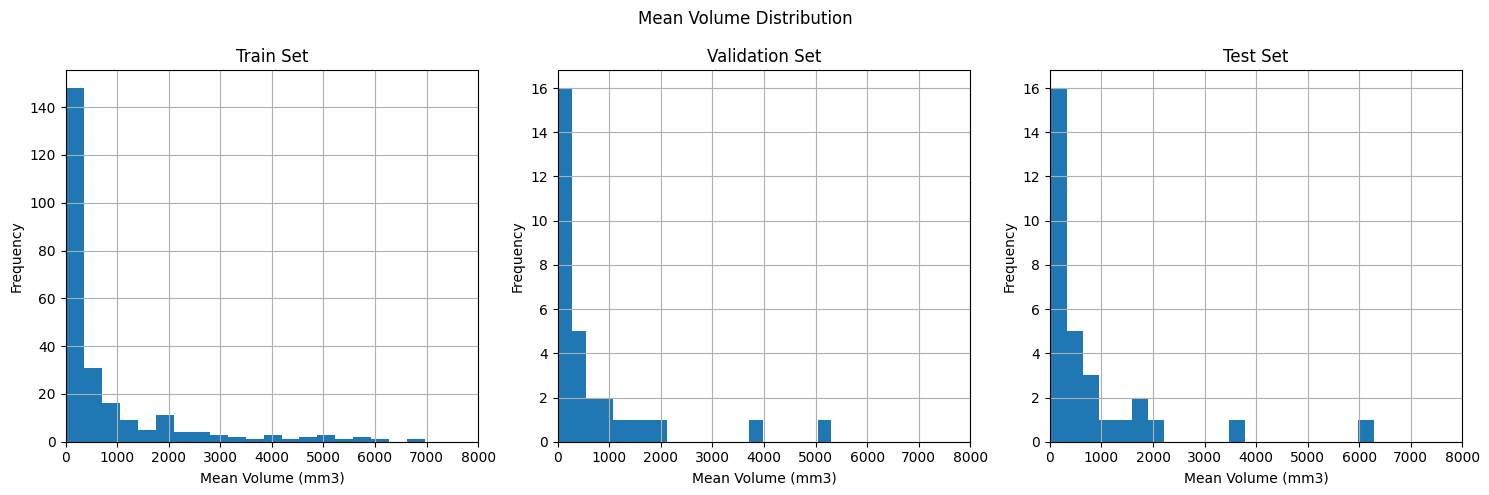

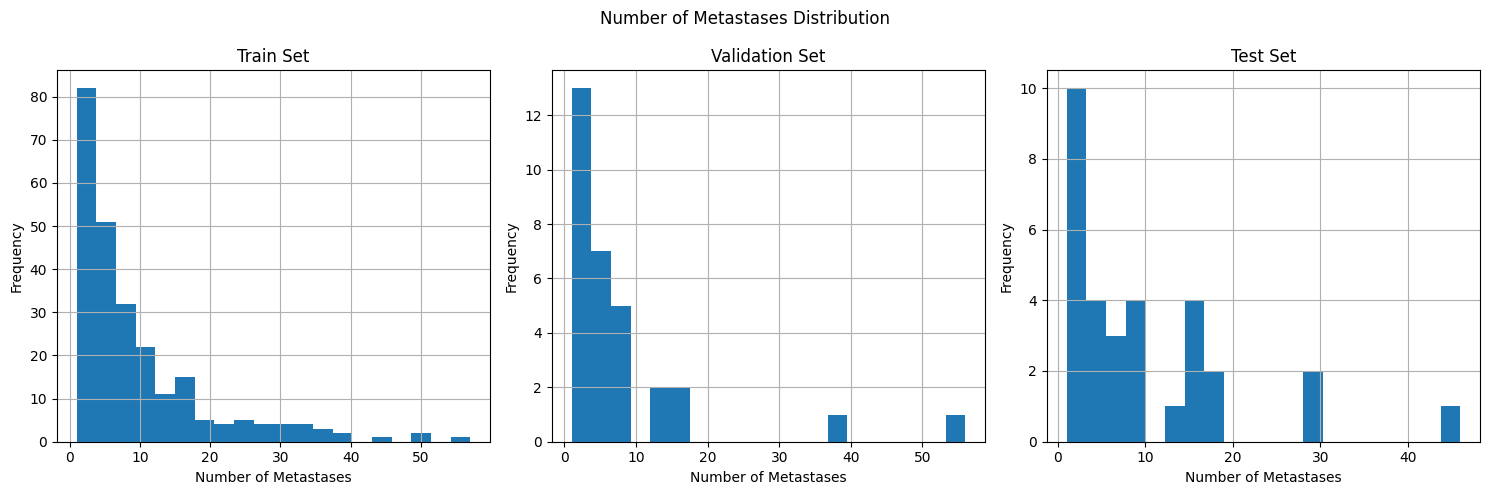

In [18]:
# Split into Train 90% | Validation 10% | Test 10%
data = data.reset_index(drop=True)
X, X_test, y, y_test = scsplit(data, data['S-VMean'], train_size=0.9, test_size=0.1, random_state=33, stratify=data['S-VMean'])
X = X.reset_index(drop=True)
X_train, X_val, y_train, y_val = scsplit(X, X['S-VMean'], train_size=0.89, test_size=0.11, random_state=33, stratify=X['S-VMean'])

# Splits size
print('Train:', len(X_train))
print('Validation:', len(X_val))
print('Test:', len(X_test))

# Mean Volume Distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(X_train['S-VMean'], bins=20)
plt.xlabel('Mean Volume (mm3)')
plt.ylabel('Frequency')
plt.title('Train Set')
plt.grid()
plt.xlim([0, 8000])

plt.subplot(1, 3, 2)
plt.hist(X_val['S-VMean'], bins=20)
plt.xlabel('Mean Volume (mm3)')
plt.ylabel('Frequency')
plt.title('Validation Set')
plt.grid()
plt.xlim([0, 8000])

plt.subplot(1, 3, 3)
plt.hist(X_test['S-VMean'], bins=20)
plt.xlabel('Mean Volume (mm3)')
plt.ylabel('Frequency')
plt.title('Test Set')
plt.grid()
plt.xlim([0, 8000])

plt.suptitle('Mean Volume Distribution')
plt.tight_layout()
plt.show()
plt.close()

# Number of Tumors Distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(X_train['NumberMetastases'], bins=20)
plt.xlabel('Number of Metastases')
plt.ylabel('Frequency')
plt.title('Train Set')
plt.grid()

plt.subplot(1, 3, 2)
plt.hist(X_val['NumberMetastases'], bins=20)
plt.xlabel('Number of Metastases')
plt.ylabel('Frequency')
plt.title('Validation Set')
plt.grid()

plt.subplot(1, 3, 3)
plt.hist(X_test['NumberMetastases'], bins=20)
plt.xlabel('Number of Metastases')
plt.ylabel('Frequency')
plt.title('Test Set')
plt.grid()

plt.suptitle('Number of Metastases Distribution')
plt.tight_layout()
plt.show()
plt.close()

### Store

In [19]:
# Save Data
X_train.to_csv('../data/TRAIN.csv', index=False)
X_val.to_csv('../data/VAL.csv', index=False)
X_test.to_csv('../data/TEST.csv', index=False)